In [ ]:
# Importar bases de datos
from google.colab import drive
import zipfile

drive.mount('/content/drive') # nos unimos a la nube de drive

#Path de los archivos zip
zip_MESD =    '/content/drive/MyDrive/MESD.zip'
zip_IESC_1 =  '/content/drive/MyDrive/IESC-Child/IESC_p1.zip'
zip_IESC_2 =  '/content/drive/MyDrive/IESC-Child/IESC_p2.zip'
zip_EW =      '/content/drive/MyDrive/EW.zip'

# EmoWisconsin
zip_ref = zipfile.ZipFile(zip_EW, 'r')
zip_ref.extractall('/content/EW')
zip_ref.close()

# MESD
zip_ref = zipfile.ZipFile(zip_MESD, 'r')
zip_ref.extractall('/content/MESD')
zip_ref.close()

# IESC-Child
zip_ref = zipfile.ZipFile(zip_IESC_1,'r')
zip_ref.extractall('/content/IESC')
zip_ref.close()

zip_ref = zipfile.ZipFile(zip_IESC_2,'r')
zip_ref.extractall('/content/IESC/IESC-Child-RN')
zip_ref.close()

!ls

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive  EW  IESC  MESD  sample_data  TriEmoMex_V2.csv


### **Crear nueva base de datos**

In [ ]:
import os
iesc_path = '/content/IESC/IESC-Child-RN'
ew_path = '/content/EW' # Tiene subcarpetas
mesd_path = '/content/MESD/Mexican Emotional Speech Database (MESD)'

# Encuentra todos los archivos de audio de la ruta
def found_files(path):
  archivos = []
  dir_path = os.listdir(path)
  for file in dir_path:
    if 'wav' in file:
      archivos.append(file)
  return archivos

In [ ]:
iesc_files_1 = found_files(iesc_path)
print(len(iesc_files_1))
mesd_files_1 = found_files(mesd_path)
print(len(mesd_files_1))
# En el caso de la emoWisconsin, cada emoción tiene su propia carpeta

18616
862


In [ ]:
import pandas as pd
iesc_excel = pd.read_excel(r'/content/IESC/IESC-Child-RN/Files_labels.xlsx')

**Las emociones son las siguientes:**
1. neutral
2. tristeza
3. enojo
4. sorpresa
5. miedo
6. felicidad
7. desprecio
8. ninguno

In [ ]:
emociones = ['neutral', 'tristeza', 'enojo', 'sorpresa', 'miedo', 'felicidad',
             'desprecio', 'ninguno']

In [ ]:
iesc_excel.head()
iesc_excel.Emotion.unique()

array(['neutral', 'miedo', 'felicidad', 'tristeza', 'sorpresa',
       'desprecio', 'ninguno', 'enojo'], dtype=object)

## **Análisis IESC-Child**

In [ ]:
iesc_paths = iesc_excel.loc[iesc_excel.Emotion.isin(emociones)]
print(iesc_paths)
print(iesc_paths.Emotion.value_counts())

                                          Filename    Emotion     Attitude
0      005_10_14_child1_po_07_mas_segmento_201.wav    neutral  inseguridad
1      006_10_14_child2_po_06_fem_segmento_152.wav    neutral  inseguridad
2      007_10_14_child1_ne_07_mas_segmento_009.wav    neutral  inseguridad
3      008_10_14_child1_po_07_mas_segmento_199.wav    neutral  inseguridad
4      010_10_14_child2_po_06_fem_segmento_161.wav    neutral  inseguridad
...                                            ...        ...          ...
18611         211_11_25_child168_po_11_fem_129.wav  felicidad    seguridad
18612         212_11_25_child144_ne_09_mas_042.wav      enojo    seguridad
18613         213_11_25_child142_po_07_mas_088.wav    neutral  inseguridad
18614         214_11_25_child156_po_09_mas_046.wav    neutral    seguridad
18615         215_11_25_child156_ne_09_mas_134.wav    neutral    seguridad

[18616 rows x 3 columns]
neutral      9188
felicidad    4890
sorpresa     2184
ninguno       738
mi

<Axes: xlabel='Emotion', ylabel='count'>

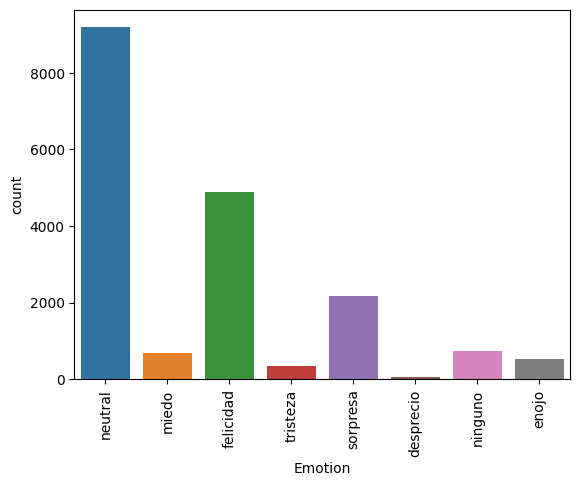

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.xticks(rotation='vertical')
sns.countplot(x=iesc_paths['Emotion'])

In [ ]:
# Obtener rutas de la IESC-Child

iesc_files = []
iesc_labels = []

for path,emotion in zip(iesc_paths.Filename, iesc_paths.Emotion):
  iesc_files.append(os.path.join(iesc_path,path))
  iesc_labels.append(emotion) # Agregamos la emocion

# Verificar si se importaron correctamente los datos
print(len(iesc_files))
print(len(iesc_labels))
print(iesc_files[0:100])

18616
18616
['/content/IESC/IESC-Child-RN/005_10_14_child1_po_07_mas_segmento_201.wav', '/content/IESC/IESC-Child-RN/006_10_14_child2_po_06_fem_segmento_152.wav', '/content/IESC/IESC-Child-RN/007_10_14_child1_ne_07_mas_segmento_009.wav', '/content/IESC/IESC-Child-RN/008_10_14_child1_po_07_mas_segmento_199.wav', '/content/IESC/IESC-Child-RN/010_10_14_child2_po_06_fem_segmento_161.wav', '/content/IESC/IESC-Child-RN/011_10_14_child2_po_06_fem_segmento_184.wav', '/content/IESC/IESC-Child-RN/012_10_14_child1_po_07_mas_segmento_217.wav', '/content/IESC/IESC-Child-RN/013_10_14_child2_po_06_fem_segmento_142.wav', '/content/IESC/IESC-Child-RN/014_10_14_child1_po_07_mas_segmento_195.wav', '/content/IESC/IESC-Child-RN/015_10_14_child1_ne_07_mas_segmento_040.wav', '/content/IESC/IESC-Child-RN/016_10_14_child2_po_06_fem_segmento_209.wav', '/content/IESC/IESC-Child-RN/017_10_14_child1_ne_07_mas_segmento_029.wav', '/content/IESC/IESC-Child-RN/019_10_14_child1_po_07_mas_segmento_208.wav', '/content/IE

**Conversión a valores enteros**

Requiere menos computación trabajar con número que con palabras.

In [ ]:
# Hacer conversión a valores enteros
label_map = {'neutral':0, 'tristeza':1, 'enojo':2, 'sorpresa':3, 'miedo':4,
             'felicidad':5, 'desprecio':6, 'ninguno':7}
iesc_ilabels = [label_map[l] for l in iesc_labels]
print(iesc_ilabels)

[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 5, 0, 0, 0, 0, 0, 4, 4, 5, 0, 5, 4, 0, 5, 0, 4, 5, 5, 4, 0, 0, 0, 4, 4, 4, 0, 0, 5, 5, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 5, 4, 0, 3, 0, 4, 0, 0, 4, 0, 0, 5, 0, 5, 4, 5, 0, 5, 5, 4, 0, 0, 0, 4, 6, 0, 4, 5, 0, 4, 0, 0, 5, 0, 1, 0, 1, 0, 1, 5, 0, 0, 0, 0, 5, 0, 0, 5, 0, 6, 0, 4, 7, 0, 3, 5, 7, 0, 4, 1, 7, 7, 3, 5, 7, 5, 5, 5, 0, 0, 5, 0, 5, 5, 0, 5, 5, 5, 0, 5, 2, 0, 5, 2, 0, 0, 3, 0, 0, 3, 0, 5, 0, 0, 4, 5, 7, 7, 1, 4, 3, 0, 0, 0, 0, 0, 3, 0, 5, 0, 0, 1, 7, 5, 7, 0, 0, 5, 4, 4, 7, 7, 7, 7, 4, 5, 3, 0, 0, 7, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 4, 7, 0, 0, 7, 7, 0, 0, 0, 7, 0, 0, 0, 5, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 7, 5, 7, 0, 3, 5, 5, 5, 5, 0, 0, 5, 5, 4, 7, 0, 7, 0, 0, 5, 7, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 5, 0, 0, 0, 1, 7, 5, 5, 0, 0, 0, 4, 0, 0, 0, 0, 5, 0, 0, 0, 5, 7, 0, 0, 0, 0, 3, 0, 0, 0, 5, 0, 0, 0, 1, 0, 0, 

## **Análisis de la MESD**

In [ ]:
# Dado que las emociones están escritas en inglés, realizaremos una
# lsita de las traducciones de las emociones

emotions = ['Neutral', 'Fear', 'Happiness', 'Sadness','Surprise',
            'Disgust','None','Anger']
print(mesd_files_1)
mesd_paths = []
mesd_labels = []

for file in mesd_files_1:
  if file.split('_')[1] == 'C': # 'C' de Child
    emotion = file.split('_')[0]
    if emotion in emotions:
      mesd_paths.append(file)
      mesd_labels.append(emotion)

print(len(mesd_paths))
print(len(mesd_labels))

['Neutral_C_B_seco.wav', 'Fear_C_A_izquierda.wav', 'Sadness_M_A_rapido.wav', 'Anger_C_A_arriba.wav', 'Sadness_F_B_desmayo.wav', 'Sadness_M_A_hoy.wav', 'Neutral_C_B_robusto.wav', 'Sadness_M_B_conflicto.wav', 'Neutral_C_B_temporal.wav', 'Sadness_F_A_abajo.wav', 'Sadness_F_A_detras.wav', 'Neutral_C_B_labrador.wav', 'Neutral_C_A_no.wav', 'Sadness_F_A_arriba.wav', 'Fear_M_A_rapido.wav', 'Disgust_M_B_delincuencia.wav', 'Anger_C_B_condena.wav', 'Anger_C_A_hola.wav', 'Happiness_C_B_baile.wav', 'Fear_F_B_delincuencia.wav', 'Sadness_F_A_hoy.wav', 'Happiness_C_A_tarde.wav', 'Disgust_M_B_monstruo.wav', 'Fear_C_A_ayer.wav', 'Sadness_M_A_si.wav', 'Anger_M_A_detras.wav', 'Happiness_M_A_hola.wav', 'Neutral_F_A_adios.wav', 'Anger_F_B_pesadilla.wav', 'Neutral_M_A_izquierda.wav', 'Fear_C_A_detras.wav', 'Anger_C_A_no.wav', 'Neutral_F_A_arriba.wav', 'Disgust_M_A_ayer.wav', 'Fear_M_A_no.wav', 'Anger_M_B_amenazado.wav', 'Sadness_C_B_explosivo.wav', 'Neutral_M_B_extenso.wav', 'Sadness_F_B_abuso.wav', 'Anger_M

<Axes: ylabel='count'>

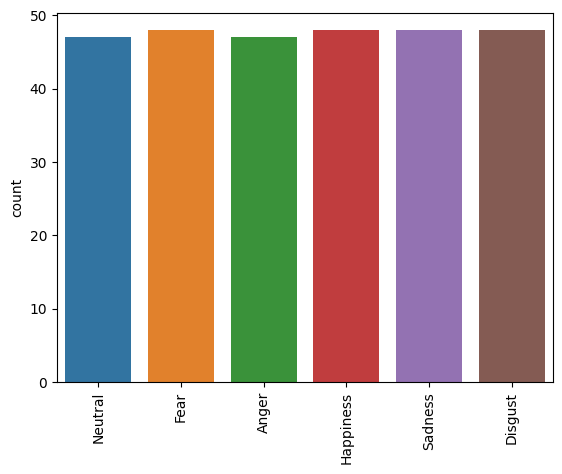

In [ ]:
plt.xticks(rotation='vertical')
sns.countplot(x=mesd_labels)

In [ ]:
# Obtener path completo
mesd_files = []

for path in mesd_paths:
    mesd_files.append(os.path.join(mesd_path,path))

print(len(mesd_paths))
print(len(mesd_files))
print(len(mesd_labels))

286
286
286


**Convertir a valores enteros**

In [ ]:
# Convertir a valores enteros
label_map = {'Neutral':0, 'Sadness':1, 'Anger':2, 'Surprise':3,'Fear':4,
            'Happiness':5, 'Disgust':6, 'None':7}

mesd_ilabels = [label_map[l] for l in mesd_labels]
print(mesd_ilabels)

[0, 4, 2, 0, 0, 0, 0, 2, 2, 5, 5, 4, 4, 2, 1, 4, 5, 0, 5, 2, 1, 4, 0, 2, 4, 0, 0, 1, 6, 2, 4, 5, 4, 0, 2, 6, 5, 5, 2, 0, 5, 2, 1, 0, 5, 6, 0, 4, 0, 6, 1, 4, 6, 1, 2, 4, 5, 6, 4, 5, 2, 4, 6, 5, 5, 0, 5, 2, 6, 5, 6, 6, 0, 5, 0, 1, 2, 5, 2, 4, 5, 6, 0, 5, 6, 2, 1, 2, 2, 6, 0, 2, 6, 4, 6, 5, 0, 0, 4, 2, 0, 5, 6, 2, 1, 5, 5, 4, 5, 6, 6, 6, 2, 0, 5, 1, 5, 5, 5, 2, 4, 2, 4, 2, 1, 5, 0, 1, 4, 1, 2, 2, 0, 6, 2, 4, 2, 0, 1, 4, 2, 4, 1, 2, 5, 4, 5, 6, 6, 4, 2, 4, 1, 1, 0, 1, 0, 2, 0, 5, 1, 0, 6, 4, 0, 5, 4, 6, 6, 6, 4, 6, 1, 6, 6, 0, 0, 1, 4, 5, 2, 5, 0, 1, 6, 2, 4, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 5, 4, 4, 1, 0, 4, 2, 6, 5, 1, 4, 0, 6, 1, 0, 2, 1, 2, 2, 0, 2, 6, 4, 1, 6, 5, 4, 0, 1, 6, 4, 0, 5, 2, 5, 1, 5, 2, 5, 0, 2, 6, 6, 5, 6, 1, 1, 6, 6, 1, 4, 5, 4, 1, 6, 2, 1, 4, 1, 5, 1, 5, 2, 4, 6, 4, 0, 6, 0, 6, 0, 4, 1, 6, 0, 4, 6, 6, 4, 5, 4, 1, 5, 1, 4, 6, 1, 1, 1]


# **Análisis de EmoWisconsin**

Observamos que las emociones que coinciden son:
* molesto, neutro e indefinido

In [ ]:
print(os.listdir(ew_path))

molesto_path = os.path.join(ew_path, 'AY - molesto')
neutro_path = os.path.join(ew_path, 'NT - neutro')
indefinido_path = os.path.join(ew_path, 'UD - indefinido')

ew_files = []
ew_labels = []

def found_files(path, label):
  dir_path = os.listdir(path)
  for file in dir_path:
    if 'wav' in file:
      path_ = os.path.join(path,file)
      ew_files.append(path_)
      ew_labels.append(label)
  print(len(ew_labels))

found_files(molesto_path, 'molesto')
found_files(neutro_path,'neutral')
found_files(indefinido_path,'ninguno')

print(ew_files)
print(len(ew_files))
print(len(ew_labels))

['DF - inseguro', 'CF - seguro', 'NV - nervioso', 'UD - indefinido', 'AY - molesto', 'ACII 2011 - EmoWisconsin An emotional children speech.pdf', 'MT - motivado', 'annotation_categorical_continuous.xlsx', 'NT - neutro']
17
38
275
['/content/EW/AY - molesto/15_gae_neg_029.wav', '/content/EW/AY - molesto/15_gae_neg_019.wav', '/content/EW/AY - molesto/15_gae_neg_011.wav', '/content/EW/AY - molesto/20_ale_neg_079.wav', '/content/EW/AY - molesto/15_gae_pos_039.wav', '/content/EW/AY - molesto/15_gae_neg_015.wav', '/content/EW/AY - molesto/07_sof_neg_010.wav', '/content/EW/AY - molesto/15_gae_neg_010.wav', '/content/EW/AY - molesto/15_gae_neg_026.wav', '/content/EW/AY - molesto/15_gae_neg_031.wav', '/content/EW/AY - molesto/15_gae_pos_043.wav', '/content/EW/AY - molesto/15_gae_neg_012.wav', '/content/EW/AY - molesto/15_gae_pos_041.wav', '/content/EW/AY - molesto/15_gae_neg_020.wav', '/content/EW/AY - molesto/15_gae_neg_023.wav', '/content/EW/AY - molesto/15_gae_pos_044.wav', '/content/EW/AY -

<Axes: ylabel='count'>

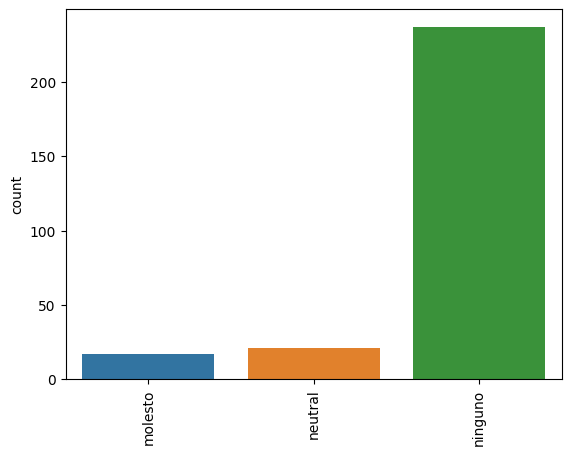

In [ ]:
plt.xticks(rotation='vertical')
sns.countplot(x=ew_labels)

**Conversión a valores enteros**


In [ ]:
label_map = {'neutral':0, 'tristeza':1, 'molesto':2, 'sorpresa':3, 'miedo':4,
             'felicidad':5, 'desprecio':6, 'ninguno':7}

ew_ilabels = [label_map[l] for l in ew_labels]
print(ew_ilabels)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


## **Unir las bases de datos**

In [ ]:
# Siempre es buena idea garantizar el tamaño de los datos
print(len(iesc_files))
print(len(mesd_files))
print(len(ew_files))

print(len(iesc_ilabels))
print(len(mesd_ilabels))
print(len(ew_ilabels))

18616
286
275
18616
286
275


## **Upload audios**

Respecto a la *IESC-Child*, se puede abordar de dos maneras la selección de los audios:
1. Eligir al azar para alcanzar las 1000 muestras
2. Dado que la longitud de los audios varía, obtener la media y seleccionar los de menos desviación de la media.

*Es intersante investigar si existe otra solución al problema sin tener que cargar los audios*

In [ ]:
""" =============================
    ===== SELECCIÓN AL AZAR =====
    =============================
"""

def join_ds_by_emo(files,ilabels,target_emotion,dsf_files,dsf_ilabels,num=1000):
    conteo = 0
    for file,emotion in zip(files,ilabels):
        if emotion==target_emotion:
            dsf_files.append(file)
            dsf_ilabels.append(emotion)
            conteo+=1
            if conteo >= num:
                break

    print(f'Archivos agregados: {conteo}')
    print(f'Archivos totales: {len(dsf_files)}')

In [ ]:
import random

# Listas de base de datos
dataset1_files = []
dataset1_ilabels = []

# Dado que de en IESC-Child hay bastantes datos, se hará un shuffle
iesc_zip = list(zip(iesc_files,iesc_ilabels))
random.shuffle(iesc_zip)
iesc_files, iesc_ilabels = zip(*iesc_zip)

# 1. N E U T R A L
join_ds_by_emo(mesd_files,mesd_ilabels,0,dataset1_files,dataset1_ilabels)
join_ds_by_emo(ew_files,ew_ilabels,0,dataset1_files,dataset1_ilabels)
join_ds_by_emo(iesc_files,iesc_ilabels,0,dataset1_files,dataset1_ilabels,932)

# 2. T R I S T E Z A
join_ds_by_emo(mesd_files,mesd_ilabels,1,dataset1_files,dataset1_ilabels)
join_ds_by_emo(ew_files,ew_ilabels,1,dataset1_files,dataset1_ilabels)
join_ds_by_emo(iesc_files,iesc_ilabels,1,dataset1_files,dataset1_ilabels)

# 3. M O L E S T O
join_ds_by_emo(mesd_files,mesd_ilabels,2,dataset1_files,dataset1_ilabels)
join_ds_by_emo(ew_files,ew_ilabels,2,dataset1_files,dataset1_ilabels)
join_ds_by_emo(iesc_files,iesc_ilabels,2,dataset1_files,dataset1_ilabels)

# 4. S O R P R E S A
join_ds_by_emo(mesd_files,mesd_ilabels,3,dataset1_files,dataset1_ilabels)
join_ds_by_emo(ew_files,ew_ilabels,3,dataset1_files,dataset1_ilabels)
join_ds_by_emo(iesc_files,iesc_ilabels,3,dataset1_files,dataset1_ilabels,1000)

# 5. M I E D O
join_ds_by_emo(mesd_files,mesd_ilabels,4,dataset1_files,dataset1_ilabels)
join_ds_by_emo(ew_files,ew_ilabels,4,dataset1_files,dataset1_ilabels)
join_ds_by_emo(iesc_files,iesc_ilabels,4,dataset1_files,dataset1_ilabels)

# 6. F E L I C I D A D
join_ds_by_emo(mesd_files,mesd_ilabels,5,dataset1_files,dataset1_ilabels)
join_ds_by_emo(ew_files,ew_ilabels,5,dataset1_files,dataset1_ilabels)
join_ds_by_emo(iesc_files,iesc_ilabels,5,dataset1_files,dataset1_ilabels,952)

# 7. N I N G U N O
join_ds_by_emo(mesd_files,mesd_ilabels,6,dataset1_files,dataset1_ilabels)
join_ds_by_emo(ew_files,ew_ilabels,6,dataset1_files,dataset1_ilabels)
join_ds_by_emo(iesc_files,iesc_ilabels,6,dataset1_files,dataset1_ilabels)

# 8. D E S P R E C I O
join_ds_by_emo(mesd_files,mesd_ilabels,7,dataset1_files,dataset1_ilabels)
join_ds_by_emo(ew_files,ew_ilabels,7,dataset1_files,dataset1_ilabels)
join_ds_by_emo(iesc_files,iesc_ilabels,7,dataset1_files,dataset1_ilabels)

Archivos agregados: 47
Archivos totales: 47
Archivos agregados: 21
Archivos totales: 68
Archivos agregados: 932
Archivos totales: 1000
Archivos agregados: 48
Archivos totales: 1048
Archivos agregados: 0
Archivos totales: 1048
Archivos agregados: 339
Archivos totales: 1387
Archivos agregados: 47
Archivos totales: 1434
Archivos agregados: 17
Archivos totales: 1451
Archivos agregados: 529
Archivos totales: 1980
Archivos agregados: 0
Archivos totales: 1980
Archivos agregados: 0
Archivos totales: 1980
Archivos agregados: 1000
Archivos totales: 2980
Archivos agregados: 48
Archivos totales: 3028
Archivos agregados: 0
Archivos totales: 3028
Archivos agregados: 676
Archivos totales: 3704
Archivos agregados: 48
Archivos totales: 3752
Archivos agregados: 0
Archivos totales: 3752
Archivos agregados: 952
Archivos totales: 4704
Archivos agregados: 48
Archivos totales: 4752
Archivos agregados: 0
Archivos totales: 4752
Archivos agregados: 72
Archivos totales: 4824
Archivos agregados: 0
Archivos totale

<Axes: ylabel='count'>

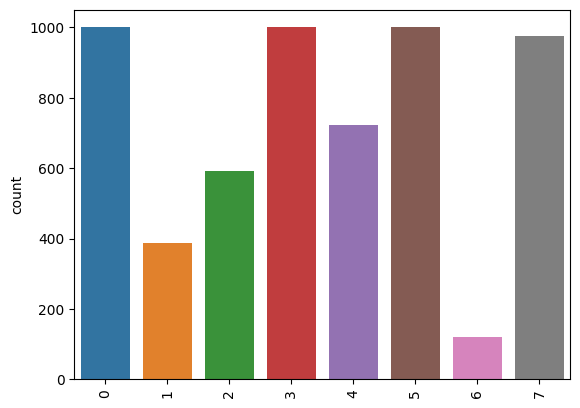

In [ ]:
plt.xticks(rotation='vertical')
sns.countplot(x = dataset1_ilabels)

### **Crear DataFrame**

In [ ]:
dataset1 = pd.DataFrame({'audio':dataset1_files,
                         'emotion':dataset1_ilabels})
dataset1.head()
dataset1.emotion.unique()
dataset1.emotion.value_counts()

0    1000
3    1000
5    1000
7     975
4     724
2     593
1     387
6     120
Name: emotion, dtype: int64

In [ ]:
dataset1.to_csv('TriEmoMex_V2.csv')